# Pokemon GO shiny rates: a Bayesian perspective
This document aims to re-study Pokemon GO shiny rates using data collected by The Silph Road.

## Background: Silph, shinies, and statistics
[The Silph Road](https://thesilphroad.com/) is the largest online and in-person network of Pokemon GO players. Silph organizes regional groups of Pokemon GO players, sets up in-person tournaments, and conducts field studies to learn about game mechanics of Pokemon GO. Of particular interest to us is the *shiny rate*, which is the probability that a Pokemon found in the wild will be shiny (for non-Pokemon players, this just means it's rare and specially coloured; it's like a trophy). Though not publicized by the game developer Niantic, this rate has been of great interest to Pokemon GO players (after all, shinies are basically just loot boxes ...).

Silph publishes [field studies](https://thesilphroad.com/science/oddish-shiny-rates/) to determine shiny rates, and these studies have resulted in two consensus rates: one "standard" rate of 1/450 (used for the vast majority of Pokemon), and one "boosted" rate of 1/150 (used during certain events). Recently, however, those rates have been [called into question](https://old.reddit.com/r/TheSilphRoad/comments/dd79zk/its_time_to_rethink_the_assumed_shiny_rates_from/) on the Silph subreddit, saying that these assumed shiny rates are likely inaccurate.

Statistically speaking, a couple of users have demonstrated that the assumed rates of 1 in 450 and 1 in 150 are probably inaccurate. The post linked above [drew attention](https://old.reddit.com/r/TheSilphRoad/comments/dd79zk/its_time_to_rethink_the_assumed_shiny_rates_from/) to a source using bot data to discredit the 1 in 450 rate (which is against the Silph terms), and another [showed](https://old.reddit.com/r/TheSilphRoad/comments/dd6ln1/world_wide_oddish_shiny_rates/f2egcsx/) that the 1 in 150 rate is not within a 99% confidence interval from recent events.

My belief is that this conversation has simply lacked nuance. Silph has, perhaps unknowingly, treated the assumed 1 in 450 shiny rate as fact on several occasions (["using the base shiny rate of 1 in 450, as expected"](https://thesilphroad.com/science/quick-discovery/ultra-bonus-week-3-shiny-rates/), ["using the standard 1 in 450 rate"](https://thesilphroad.com/science/quick-discovery/johto-journey-sentret-gligar-shiny-rates/), and ["both species are using the standard 1 in 450 shiny rate"](https://thesilphroad.com/science/quick-discovery/water-festival-2019-barboach-and-carvanha-shiny-rates/)), but they may not realize the degree to which people believe their observations to be fact. Critics of Silph have claimed that they are [spreading misinformation](https://old.reddit.com/r/TheSilphRoad/comments/dd79zk/its_time_to_rethink_the_assumed_shiny_rates_from/f2er33m/), but this too is unfair: at best they are overstating the certainty in their conclusions.

Finally, to Silph's credit: they are a volunteer group of researchers, and few others are doing *any* research into Pokemon GO shiny rates. As the head of Silph [said](https://old.reddit.com/r/TheSilphRoad/comments/dd79zk/its_time_to_rethink_the_assumed_shiny_rates_from/f2esyq8/), the focus of these studies was *not* re-affirming the assumed rate, but rather determining if a particular event had the standard or boosted rate, whatever those are. Their treatment of statistics is far better than the average layperson, and I commend them for that. But I think we can do better.



## Methodology
I went through the Silph archives looking for their shiny rate publications posted this year, and gathered them into a file `rates.csv`. The null rows in this file were the result of Silph not reporting their exact numbers (e.g., see [Spoink](https://thesilphroad.com/science/lunar-new-year-boosted-lucky-rates/) ("over 16,500 Spoink") and [Adventure Week](https://thesilphroad.com/science/quick-discovery/adventure-week-shiny-rates/) ("over 30,000 encounters each")). I chose to keep these in the dataset in case someone asks "what happened?" The two rows from Gligar were the result of an apparent change in the shiny rate after ~24 hours, which I am taking to be fact.

In [1]:
import pandas as pd

rates = pd.read_csv("rates.csv")
rates.sample(5)

,url,date,name,n_encounters,n_shiny
27,https://thesilphroad.com/science/lunar-new-yea...,20190214,spoink,NaN,NaN
5,https://thesilphroad.com/science/quick-discove...,20190903,sentret,19297.0,54.0
7,https://thesilphroad.com/science/quick-discove...,20190903,gligar_later,4234.0,33.0
21,https://thesilphroad.com/science/quick-discove...,20190615,onix,NaN,NaN
22,https://thesilphroad.com/science/quick-discove...,20190615,lileep,NaN,NaN


Let's compute the odds ratio `n_encounters / n_shinies`.

In [2]:
rates["odds"] = rates["n_encounters"] / rates["n_shiny"]
rates = rates.sort_values("odds").dropna()
rates

,url,date,name,n_encounters,n_shiny,odds
26,https://thesilphroad.com/science/shiny-meltan-...,20190225,meltan,7850.0,128.0,61.328125
17,https://thesilphroad.com/science/quick-discove...,20190629,exeggutor_a,1048.0,17.0,61.647059
15,https://thesilphroad.com/science/quick-discove...,20190704,nidoran_m,5722.0,53.0,107.962264
2,https://thesilphroad.com/science/quick-discove...,20190921,yanma,4052.0,37.0,109.513514
20,https://thesilphroad.com/science/go-fest-weeke...,20190613,horsea,7303.0,64.0,114.109375
0,https://thesilphroad.com/science/oddish-shiny-...,20191004,oddish,10988.0,94.0,116.893617
13,https://thesilphroad.com/science/quick-discove...,20190727,sneasel,1588.0,13.0,122.153846
7,https://thesilphroad.com/science/quick-discove...,20190903,gligar_later,4234.0,33.0,128.303030
10,https://thesilphroad.com/science/quick-discove...,20190806,poliwag,5627.0,40.0,140.675000
24,https://thesilphroad.com/science/extraordinary...,20190522,bronzor,2479.0,15.0,165.266667


Domain knowledge tells us that there are three classes of shiny rates here: a highly boosted one (around 1 in 60, for Alolan Exeggutor and Meltan), one boosted one (which Silph claims to be 1 in 150), and one normal one (which Silph claims to be 1 in 450). We can use this to partition the dataset manuallly, discarding the highly boosted samples because they're not relevant to this debate.

In [3]:
boosted = rates[rates["odds"].between(70, 200)].reset_index(drop=True)
unboosted = rates[rates["odds"] > 200].reset_index(drop=True)

In [4]:
boosted

,url,date,name,n_encounters,n_shiny,odds
0,https://thesilphroad.com/science/quick-discove...,20190704,nidoran_m,5722.0,53.0,107.962264
1,https://thesilphroad.com/science/quick-discove...,20190921,yanma,4052.0,37.0,109.513514
2,https://thesilphroad.com/science/go-fest-weeke...,20190613,horsea,7303.0,64.0,114.109375
3,https://thesilphroad.com/science/oddish-shiny-...,20191004,oddish,10988.0,94.0,116.893617
4,https://thesilphroad.com/science/quick-discove...,20190727,sneasel,1588.0,13.0,122.153846
5,https://thesilphroad.com/science/quick-discove...,20190903,gligar_later,4234.0,33.0,128.303030
6,https://thesilphroad.com/science/quick-discove...,20190806,poliwag,5627.0,40.0,140.675000
7,https://thesilphroad.com/science/extraordinary...,20190522,bronzor,2479.0,15.0,165.266667


In [5]:
unboosted

,url,date,name,n_encounters,n_shiny,odds
0,https://thesilphroad.com/science/quick-discove...,20190919,patrat,4479.0,16.0,279.937500
1,https://thesilphroad.com/science/quick-discove...,20190727,zubat,844.0,3.0,281.333333
2,https://thesilphroad.com/science/quick-discove...,20190919,lillipup,4567.0,14.0,326.214286
3,https://thesilphroad.com/science/quick-discove...,20190727,ekans,13018.0,37.0,351.837838
4,https://thesilphroad.com/science/quick-discove...,20190629,geodude_a,6724.0,19.0,353.894737
5,https://thesilphroad.com/science/quick-discove...,20190903,sentret,19297.0,54.0,357.351852
6,https://thesilphroad.com/science/quick-discove...,20190629,rattata_a,5179.0,14.0,369.928571
7,https://thesilphroad.com/science/quick-discove...,20190928,zangoose_seviper,8977.0,24.0,374.041667
8,https://thesilphroad.com/science/quick-discove...,20190727,koffing,24902.0,65.0,383.107692
9,https://thesilphroad.com/science/quick-discove...,20190824,barboach,9958.0,23.0,432.956522


Let's start with the proposed boosted shiny rate of 1 in 150. We'll come back to the standard one later.

## The Bayesian way of thinking
Frequentist statistics would construct a confidence interval on these rates--it's a simple proportions test--and call it a day. Indeed, that's what both Silph (see literally every publication) and [critics of Silph](https://old.reddit.com/r/TheSilphRoad/comments/dd6ln1/world_wide_oddish_shiny_rates/f2egcsx/) have done. After constructing this confidence interval, we simply check if 1/150 lies within it.

But we can do better than this yes/no response. Given that we have a prior belief that the boosted shiny rate is 1 in 150, the Bayesian way of thinking provides us with a natural way of incorporating this into our analysis: as a prior. Let's set a fairly informative prior around 1/150, but we'll say that anything between 1/100 and 1/200 is plausible. We can use a [Beta distribution](https://en.m.wikipedia.org/wiki/Beta_distribution) to represent this belief. 

In [26]:
import arviz as az
import pymc3 as pm
import seaborn as sns

az.style.use("fivethirtyeight")

Let's use a Beta prior over $p$. Using the [success rate interpretation](https://stats.stackexchange.com/a/47782) of the Beta, our prior will be fairly weak: equivalent to having seen 10 successes in 1500 trials.

We'll add a second variable, $rarity$, which is simply $1 / p$. This makes it easier to use phrases like "1 in 150" or "1 in N."

In [50]:
with pm.Model() as model:
    p = pm.Beta("p", alpha=10, beta=1490)
    rarity = pm.Deterministic("rarity", 1. / p)
    
prior_samples = pm.sample_prior_predictive(samples=10000, model=model)

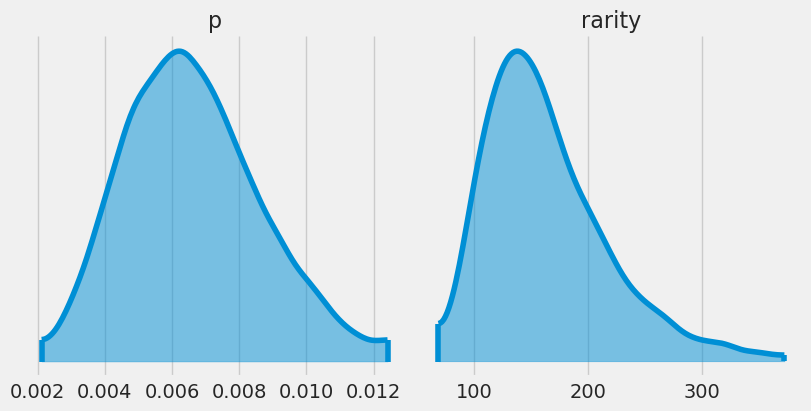

In [51]:
axes = az.plot_density(
    prior_samples,
    var_names=["p", "rarity"],
    point_estimate=None,
    credible_interval=0.99,
    shade=0.5,
    figsize=(8, 4),
)

From this, we can see that while 1/150 is at the center of our prior beliefs, we wouldn't be surprised with a rarity of 1 in 120 or 1 in 200 either. This is without having collected any data--let's add that in and see what happens.

## Statistical nuance and the importance of uncertainty
...
